<a href="https://colab.research.google.com/github/aslinurugur/hikodtaslak/blob/main/hikodtamamlanmishali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

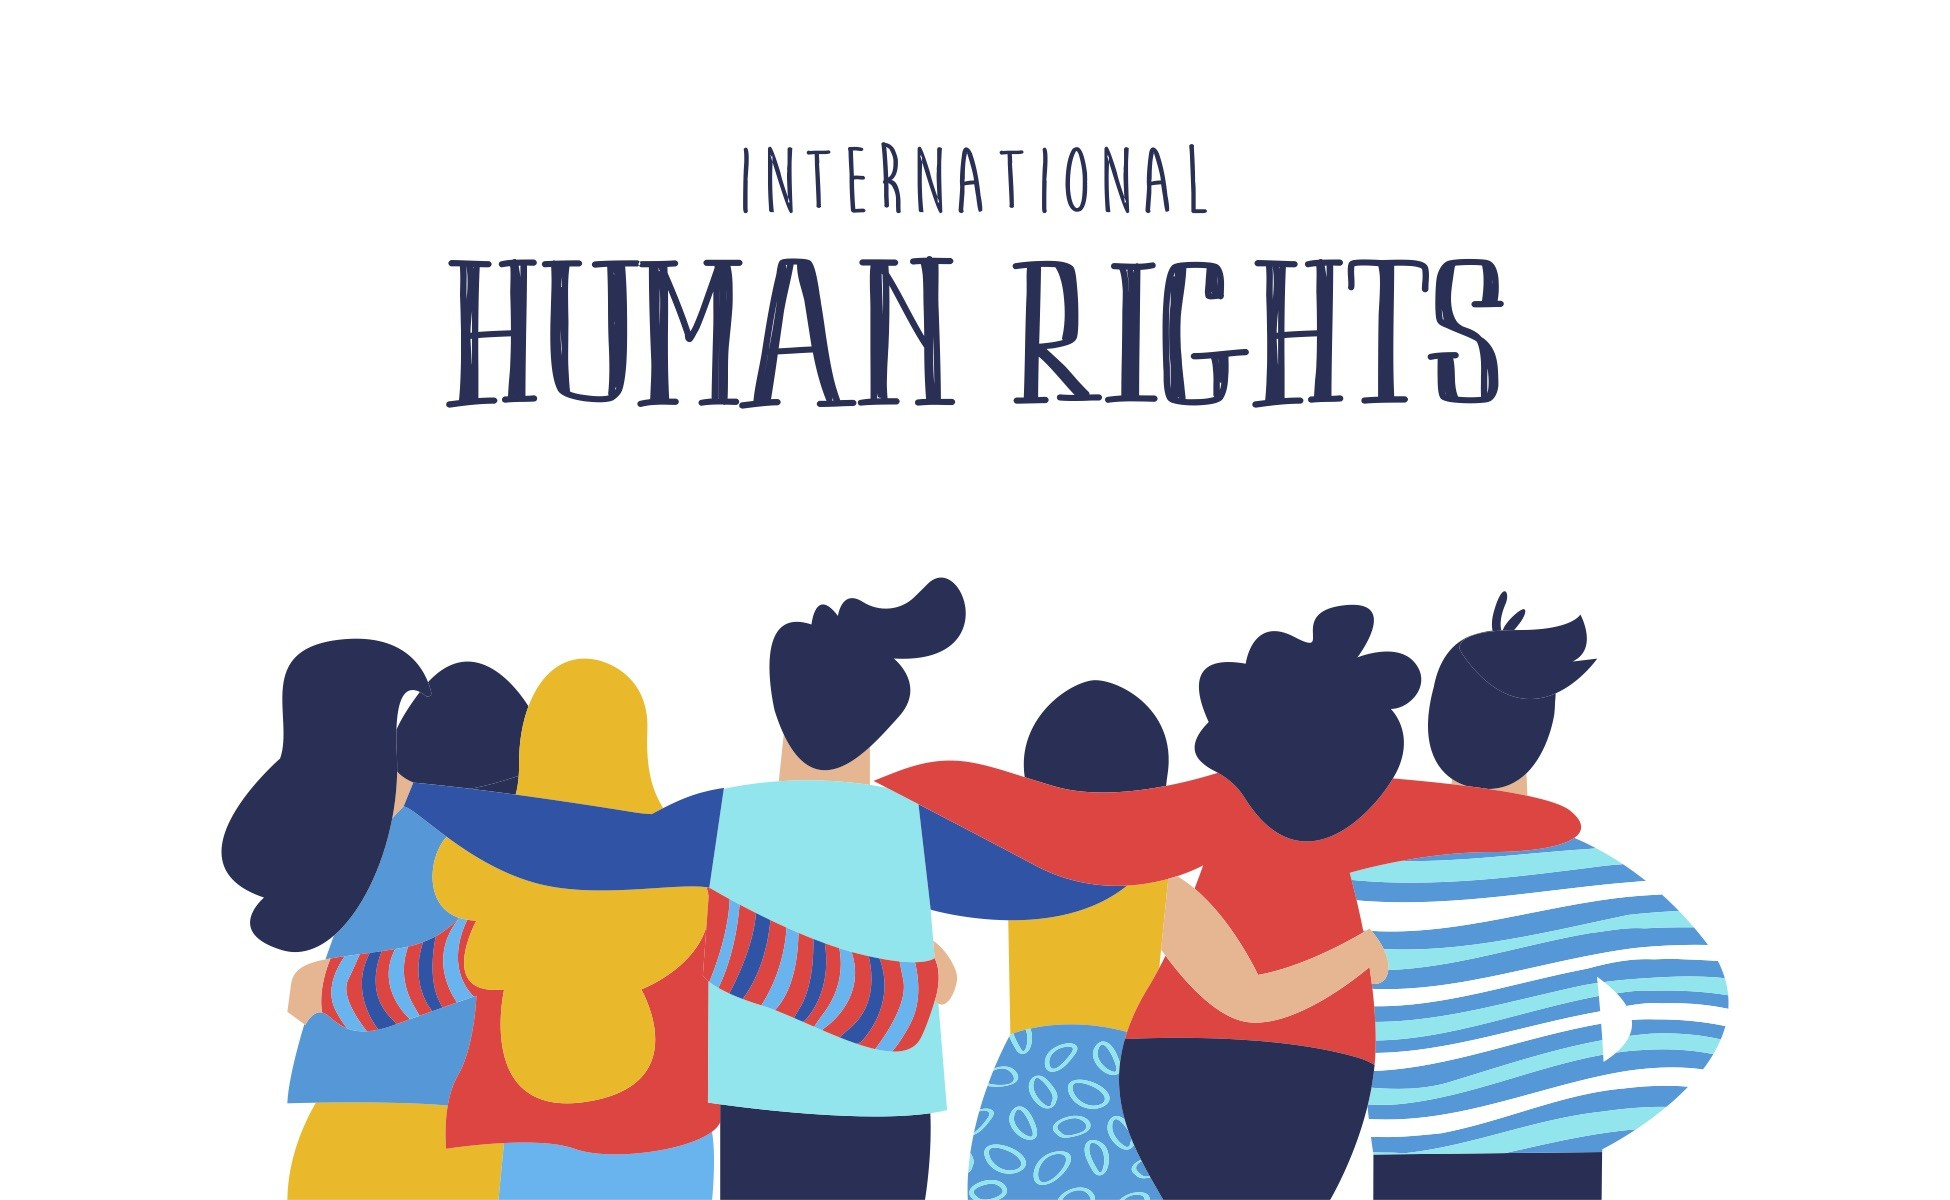

In [ ]:
from IPython.display import display, Image

display(Image(filename="freedom.png"))

# **Özgürlük Düzeylerinin Analizi: 2013-2022**  

## **Problem Tanımı**  
Dünya genelinde demokratik haklar, özgürlükler ve yönetim biçimleri yıllar içinde değişim göstermektedir. Bu projede, **2013-2022 yılları arasındaki ülkelerin özgürlük skorlarını analiz ederek bölgesel ve küresel düzeyde nasıl bir değişim yaşandığını incelemeyi** amaçlıyoruz. Ayrıca, verileri görselleştirerek ve makine öğrenmesi teknikleriyle kümeleme yaparak ülkelerin özgürlük seviyeleri açısından nasıl gruplandığını anlamaya çalışacağız.  

## **Aşamalar**  
Bu çalışma aşağıdaki temel aşamalardan oluşmaktadır:  

### 1. **Veri Ön İşleme ve Keşifsel Veri Analizi (EDA):**  
   - Veri kümesinin genel yapısının incelenmesi  
   - Veri tipleri ve eksik/tekrarlanan verilerin kontrolü  
   - Temel istatistiksel analizler  

### 2. **Veri Görselleştirme:**  
   - Bölgesel bazda özgürlük skorlarının zaman içindeki değişimi  
   - Seçili ülkelerin yıllara göre skor değişimlerinin analizi  
   - Boxplot, ısı haritası ve dünya haritası gibi görselleştirme yöntemleriyle verinin daha iyi anlaşılması  

### 3. **Makine Öğrenmesi ile Kümeleme:**  
   - K-means algoritması kullanılarak ülkelerin özgürlük skorlarına göre gruplandırılması  
   - En uygun küme sayısını belirlemek için dirsek yöntemi ve silüet analizi kullanımı  
   - Kümeleme sonuçlarının görselleştirilmesi  

Bu adımlar sayesinde ülkelerin özgürlük seviyelerindeki değişimleri detaylı bir şekilde analiz ederek, bu değişimlerin bölgesel ve küresel ölçekte nasıl bir eğilim izlediğini ortaya koymayı hedefliyoruz.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Gerekli kütüphaneler eklendi.

In [ ]:
df = pd.read_csv("Freedom-in-the-World-2013-2022-Dataset.csv") #Veriseti yüklendi.


In [ ]:
df.head() #İlk 5 veri görüntülendi.

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93


In [ ]:
df.tail() #Son 5 veri görüntülendi.

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62
2094,Zimbabwe,Africa,c,2013,NF,6,6,1,1,1,...,0,0,1,1,1,1,1,4,14,25


### 🌍 🏛️ Özgürlük Endeksi Sütun Açıklamaları

| 🏷️ **Kısa İsim** | 📝 **Açıklama** |
|-----------------|------------------------------------------------------|
| 🏳️ **C/T**      | Ülke (**C**) mi, Bölge (**T**) mi? |
| 🟢 **Status**   | Özgürlük Durumu: **🟢 F (Özgür), 🟡 PF (Kısmen Özgür), 🔴 NF (Özgür Değil)** |
| 🗳️ **PR Rating** | 🏛️ Siyasal Haklar Derecelendirmesi (1-7) |
| ⚖️ **CL Rating** | 🕊️ Sivil Özgürlükler Derecelendirmesi (1-7) |

### 🗳️ **A - Seçim Süreci**
- **A1** ✅ Mevcut yönetici özgür ve adil seçimle mi geldi?  
- **A2** 🗳️ Yasama üyeleri özgür ve adil seçimle mi seçildi?  
- **A3** ⚖️ Seçim yasaları adil mi ve tarafsız uygulanıyor mu?  

### 🏛️ **B - Siyasi Çoğulculuk ve Katılım**
- **B1** 🔀 Halk, farklı partilere katılma özgürlüğüne sahip mi?  
- **B2** 🏛️ Muhalefetin güç kazanma şansı var mı?  
- **B3** 🔗 Politik seçimler, baskı ve manipülasyondan bağımsız mı?  
- **B4** 🌍 Etnik, dini, toplumsal grupların siyasi hakları var mı?  

### 👔 **C - Hükümetin İşleyişi**
- **C1** 🏛️ Özgürce seçilmiş liderler politikaları belirleyebiliyor mu?  
- **C2** 💰 Yolsuzlukla mücadele mekanizmaları etkili mi?  
- **C3** 👀 Hükümet şeffaf ve açık mı?  

### 🏛️ **PR - Siyasal Haklar Skoru**  

### 🗣️ **D - İfade ve İnanç Özgürlüğü**
- **D1** 📰 Basın özgürlüğü var mı?  
- **D2** 🏛️ Dini inançlar özgürce ifade edilebiliyor mu?  
- **D3** 🎓 Akademik özgürlük korunuyor mu?  
- **D4** 🗨️ Bireyler politik görüşlerini özgürce ifade edebiliyor mu?  

### 🤝 **E - Dernek ve Örgütlenme Özgürlüğü**
- **E1** 📢 Toplantı ve gösteri yapma hakkı var mı?  
- **E2** 🏢 STK’lar özgürce çalışabiliyor mu?  
- **E3** ⚖️ Sendikalar bağımsız ve özgür mü?  

### ⚖️ **F - Hukukun Üstünlüğü**
- **F1** ⚖️ Yargı bağımsız mı?  
- **F2** 🏛️ Adil yargılama var mı?  
- **F3** 🚔 Polis ve güvenlik güçleri keyfi şiddet uyguluyor mu?  
- **F4** 🏳️ Farklı topluluklar yasalar karşısında eşit mi?  

### 🚶‍♀️ **G - Bireysel Özgürlükler**
- **G1** 🚗 Hareket özgürlüğü var mı?  
- **G2** 🏡 Mülkiyet hakları güvence altında mı?  
- **G3** ❤️ Kişisel haklar (evlilik, aile planlaması) korunuyor mu?  
- **G4** 💼 Ekonomik sömürüye karşı koruma var mı?  

### 📊 **CL - Sivil Özgürlükler Skoru**  

### 🌟 **Total - Toplam Skor**


In [ ]:
df.info() #veriseti hakkında bilgiler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  2095 non-null   object
 1   Region             2095 non-null   object
 2   C/T                2095 non-null   object
 3   Edition            2095 non-null   int64 
 4   Status             2095 non-null   object
 5   PR rating          2095 non-null   int64 
 6   CL rating          2095 non-null   int64 
 7   A1                 2095 non-null   int64 
 8   A2                 2095 non-null   int64 
 9   A3                 2095 non-null   int64 
 10  A                  2095 non-null   int64 
 11  B1                 2095 non-null   int64 
 12  B2                 2095 non-null   int64 
 13  B3                 2095 non-null   int64 
 14  B4                 2095 non-null   int64 
 15  B                  2095 non-null   int64 
 16  C1                 2095 non-null   int64 


In [ ]:
df["C/T"].unique() #C/T sütunundaki eşsiz değerlere bakıldı. Kategorik bir veri olduğu anlaşılıyor.

array(['t', 'c'], dtype=object)

In [ ]:
df["C/T"] = df["C/T"].astype("category")
df["Status"] = df["Status"].astype("category")
df['Edition'] = pd.to_datetime(df['Edition'], format='%Y').dt.year #"C/T", "Status" sütunları kategorik, "Edition" sütunu tarih formatında değiştirildi.




In [ ]:
df.info() #Veri tiplerinin düzeltilmiş hali.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Country/Territory  2095 non-null   object  
 1   Region             2095 non-null   object  
 2   C/T                2095 non-null   category
 3   Edition            2095 non-null   int32   
 4   Status             2095 non-null   category
 5   PR rating          2095 non-null   int64   
 6   CL rating          2095 non-null   int64   
 7   A1                 2095 non-null   int64   
 8   A2                 2095 non-null   int64   
 9   A3                 2095 non-null   int64   
 10  A                  2095 non-null   int64   
 11  B1                 2095 non-null   int64   
 12  B2                 2095 non-null   int64   
 13  B3                 2095 non-null   int64   
 14  B4                 2095 non-null   int64   
 15  B                  2095 non-null   int64   
 16  C1    

In [ ]:
df.isna().sum() #Boş değer kontrolü.

,0
Country/Territory,0
Region,0
C/T,0
Edition,0
Status,0
PR rating,0
CL rating,0
A1,0
A2,0
A3,0


In [ ]:
# Aynı satırlar var mı diye kontrol edildi.
duplicate_rows = df[df.duplicated(keep=False)]
# ilk 10 aynı satır
duplicate_rows.head(10)

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total


In [ ]:
df.describe().T #İstatiksel analiz

,count,mean,std,min,25%,50%,75%,max
Edition,2095.0,2017.503103,2.873464,2013.0,2015.0,2018.0,2020.0,2022.0
PR rating,2095.0,3.575656,2.211561,1.0,1.0,3.0,6.0,7.0
CL rating,2095.0,3.458234,1.932492,1.0,2.0,3.0,5.0,7.0
A1,2095.0,2.412888,1.615921,0.0,1.0,3.0,4.0,4.0
A2,2095.0,2.523628,1.527616,0.0,1.0,3.0,4.0,4.0
A3,2095.0,2.391885,1.419146,0.0,1.0,3.0,4.0,4.0
A,2095.0,7.328401,4.425660,0.0,3.0,9.0,12.0,12.0
B1,2095.0,2.599523,1.401493,0.0,1.0,3.0,4.0,4.0
B2,2095.0,2.466826,1.572119,0.0,1.0,3.0,4.0,4.0
B3,2095.0,2.253461,1.435066,0.0,1.0,2.0,4.0,4.0


In [ ]:
df.shape #Veri setinin satır,sütun bilgisi.

(2095, 42)

In [ ]:
df["Edition"].unique() #Hangi yıllar olduğu kontrol edildi.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013],
      dtype=int32)

In [ ]:
pip install plotly pandas


In [ ]:
import pandas as pd
import plotly.express as px


In [ ]:
df["Country/Territory"].unique() #Hangi ülkeler olduğu kontrol edildi.

array(['Abkhazia', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Crimea', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Donbas', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gaza Strip', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenad

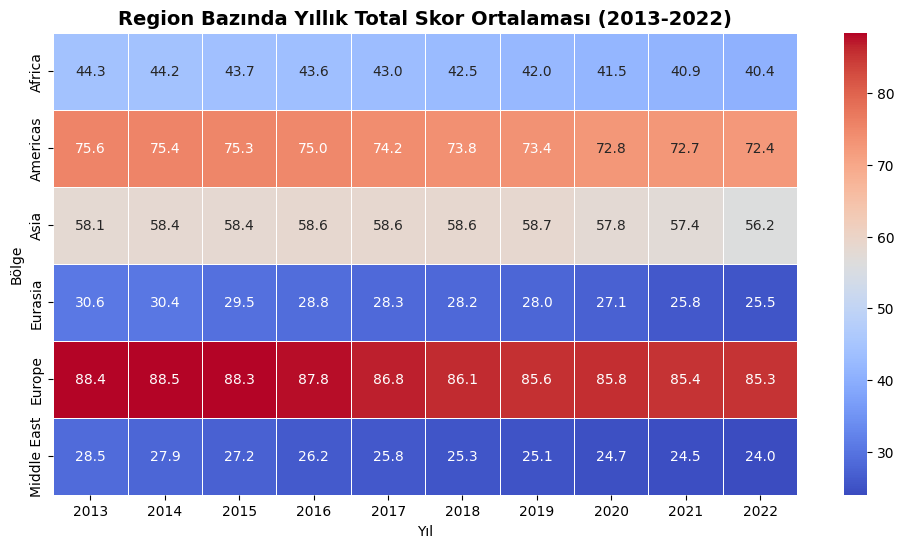

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Region - Edition bazında ortalamayı alarak tekrar edenler kaldırıldı.
df_grouped = df.groupby(["Region", "Edition"], as_index=False)["Total"].mean()

# Veri pivot tabloya çevrildi.
pivot_df = df_grouped.pivot(index="Region", columns="Edition", values="Total")

# Isı haritası çizildi.
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f")

# Başlık ve eksen etiketleri belirlendi.
plt.title("Region Bazında Yıllık Total Skor Ortalaması (2013-2022)", fontsize=14, fontweight="bold")
plt.xlabel("Yıl")
plt.ylabel("Bölge")

plt.show()


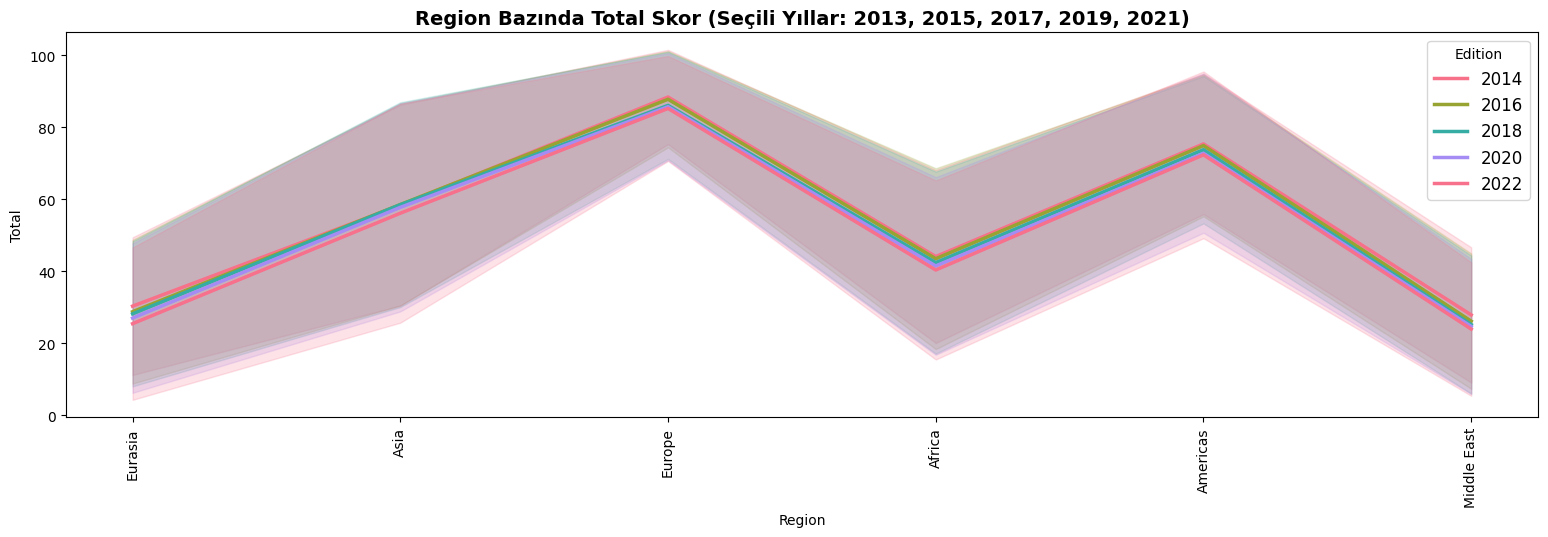

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boş bir liste oluşturuldu.
df_filtered = []

# Her satır için koşul kontrolü yapıldı.
for index, row in df.iterrows():
    if row["Edition"] in [2014, 2016, 2018, 2020, 2022]:
        df_filtered.append(row)

# Liste DataFrame' e çevrildi.
df_filtered = pd.DataFrame(df_filtered)


plt.figure(figsize=(19,5))  # Figür boyutu belirlendi.

# Renk paleti seçildi.
sns.lineplot(x="Region", y="Total", hue="Edition", data=df_filtered, palette="husl", linewidth=2.5, errorbar="sd")

# Başlık ve eksen ayarları yapıldı.
plt.title("Region Bazında Total Skor (Seçili Yıllar: 2013, 2015, 2017, 2019, 2021)", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(title="Edition", fontsize=12)

plt.show()

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt #Gerekli kütüphaneler eklendi.

In [ ]:
fig = make_subplots(rows=3,cols=2) ## 3 satır ve 2 sütundan oluşan 6 subplot'lı bir ızgara oluşturuldu.

In [ ]:
data_method = df.groupby(["Edition", "Region"])[["Total"]].sum().reset_index() #"Edition" ve "Region" sütunlarına göre gruplama yapılarak "Total" sütunlarının toplamı alındı.
data_method

,Edition,Region,Total
0,2013,Africa,2482
1,2013,Americas,2721
2,2013,Asia,2498
3,2013,Eurasia,489
4,2013,Europe,3802
5,2013,Middle East,428
6,2014,Africa,2473
7,2014,Americas,2716
8,2014,Asia,2512
9,2014,Eurasia,486


In [ ]:
Eurasia = data_method[data_method["Region"]=="Eurasia"]
Asia = data_method[data_method["Region"]=="Asia"]
Europe = data_method[data_method["Region"]=="Europe"]
Africa = data_method[data_method["Region"]=="Africa"]
Americas  = data_method[data_method["Region"]=="Americas"]
Middle_East = data_method[data_method["Region"]=="Middle East"] #Bölge bazında filtreleme yapıldı.

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Alt grafiklerin olduğu bir figür oluştur
fig = make_subplots(rows=3, cols=2, subplot_titles=["Eurasia", "Asia", "Europe", "Africa", "Americas", "Middle East"])

# Her bölge için çizgi grafiği ekle
fig.add_trace(go.Scatter(x=Eurasia["Edition"], y=Eurasia["Total"], mode='lines', name="Eurasia"), row=1, col=1)
fig.add_trace(go.Scatter(x=Asia["Edition"], y=Asia["Total"], mode='lines', name="Asia"), row=1, col=2)
fig.add_trace(go.Scatter(x=Europe["Edition"], y=Europe["Total"], mode='lines', name="Europe"), row=2, col=1)
fig.add_trace(go.Scatter(x=Africa["Edition"], y=Africa["Total"], mode='lines', name="Africa"), row=2, col=2)
fig.add_trace(go.Scatter(x=Americas["Edition"], y=Americas["Total"], mode='lines', name="Americas"), row=3, col=1)
fig.add_trace(go.Scatter(x=Middle_East["Edition"], y=Middle_East["Total"], mode='lines', name="Middle East"), row=3, col=2)

# Grafiği göster
fig.show()



In [ ]:
TR= df[df["Country/Territory"]=="Turkey"][["Edition", "Status"]] # "Turkey" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
US= df[df["Country/Territory"]=="United States"][["Edition", "Status"]] # "United States" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
IR= df[df["Country/Territory"]=="Iran"][["Edition", "Status"]] # "Iran" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
SW= df[df["Country/Territory"]=="Switzerland"][["Edition", "Status"]] # "Switzerland" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
RS= df[df["Country/Territory"]=="Russia"][["Edition", "Status"]] # "Russia" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
TH= df[df["Country/Territory"]=="Thailand"][["Edition", "Status"]] # "Thailand" ülkesine ait "Edition" ve "Status" sütunları filtrelendi.

In [ ]:
fig2 = make_subplots(rows=3, cols=2)  # 3 satır ve 2 sütundan oluşan bir subplot ızgarası oluşturuldu.

fig2.append_trace(go.Scatter(x=TR["Edition"], y=TR["Status"], name="Turkey", mode="lines"), row=1, col=1)
fig2.append_trace(go.Scatter(x=US["Edition"], y=US["Status"], name="United States", mode="lines"), row=1, col=2)
fig2.append_trace(go.Scatter(x=IR["Edition"], y=IR["Status"], name="Iran", mode="lines"), row=2, col=1)
fig2.append_trace(go.Scatter(x=SW["Edition"], y=SW["Status"], name="Switzerland", mode="lines"), row=2, col=2)
fig2.append_trace(go.Scatter(x=RS["Edition"], y=RS["Status"], name="Russia", mode="lines"), row=3, col=1)
fig2.append_trace(go.Scatter(x=TH["Edition"], y=TH["Status"], name="Thailand", mode="lines"), row=3, col=2)

fig2.show()


In [ ]:
df["Region"].unique() #Hangi bölgelerin olduğuna bakıldı.

array(['Eurasia', 'Asia', 'Europe', 'Africa', 'Americas', 'Middle East'],
      dtype=object)

In [ ]:
africa_data = df[df["Region"] == "Africa"] # "Afrika" bölgesi filtrelendi.

In [ ]:
africa_averages = africa_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Afrika" bölgesinin ortalama değerleri gruplandılarak alındı.

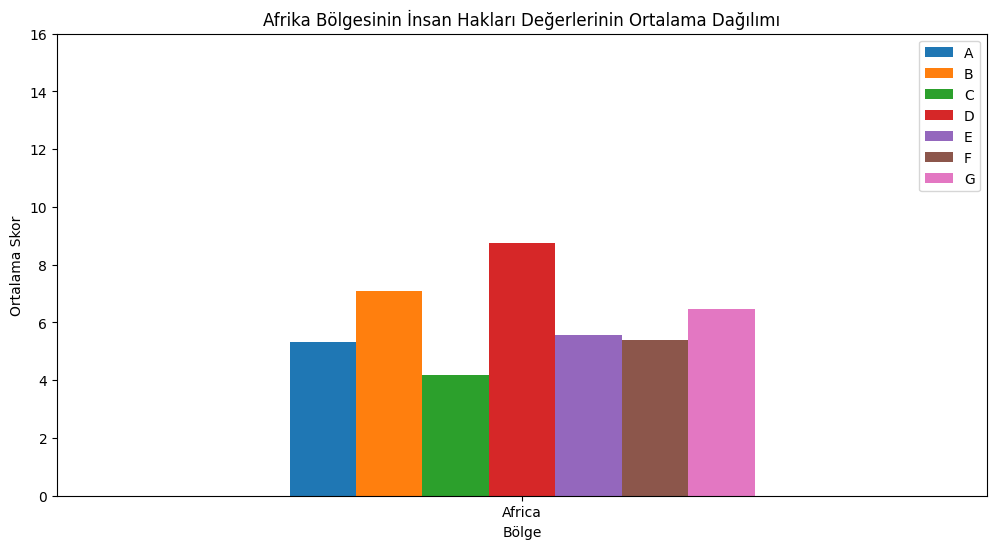

In [ ]:
africa_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Afrika Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Africa" bölgesinin grafiği oluşturuldu.

In [ ]:
eurasia_data = df[df["Region"] == "Eurasia"] # "Eurasia" bölgesi filtrelendi.

In [ ]:
eurasia_averages = eurasia_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Eurasia" bölgesinin ortalama değerleri gruplandılarak alındı.

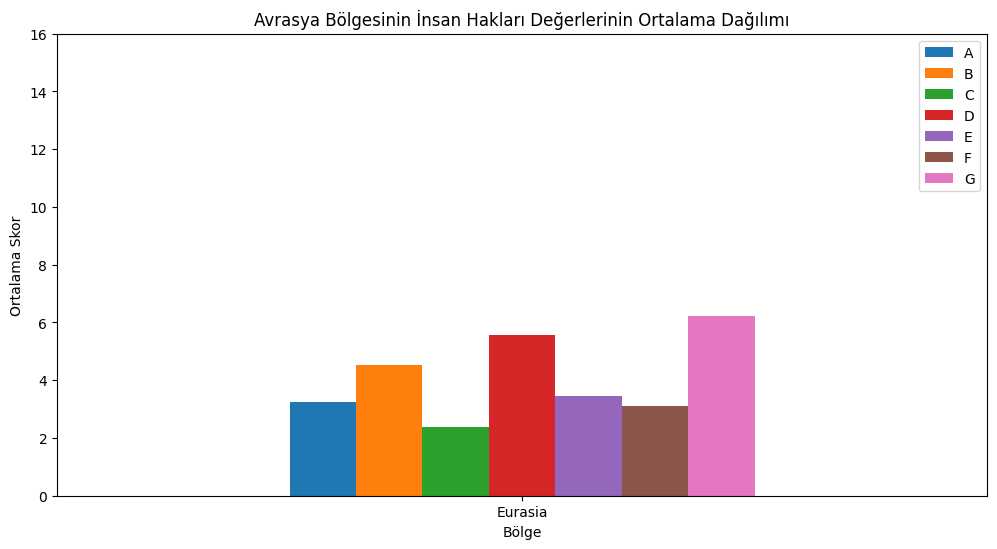

In [ ]:
eurasia_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Avrasya Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Eurasia" bölgesinin grafiği oluşturuldu.

In [ ]:
asia_data = df[df["Region"] == "Asia"] # "Asia" bölgesi filtrelendi.

In [ ]:
asia_averages = asia_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean()  # "Asia" bölgesinin ortalama değerleri gruplandılarak alındı.

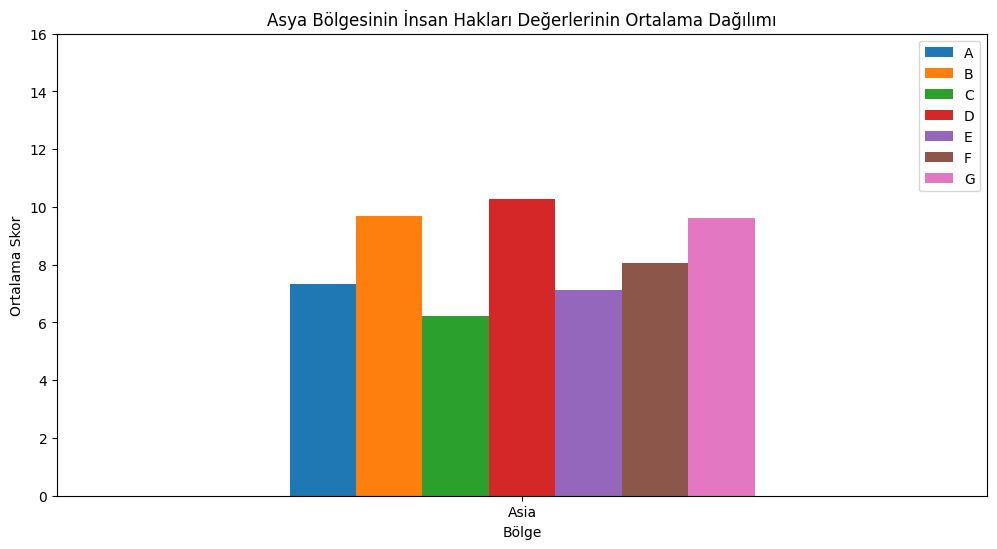

In [ ]:
asia_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Asya Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Asia" bölgesinin grafiği oluşturuldu.

In [ ]:
europe_data = df[df["Region"] == "Europe"] # "Europe" bölgesi filtrelendi.

In [ ]:
europe_averages = europe_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean()  # "Europe" bölgesinin ortalama değerleri gruplandılarak alındı.

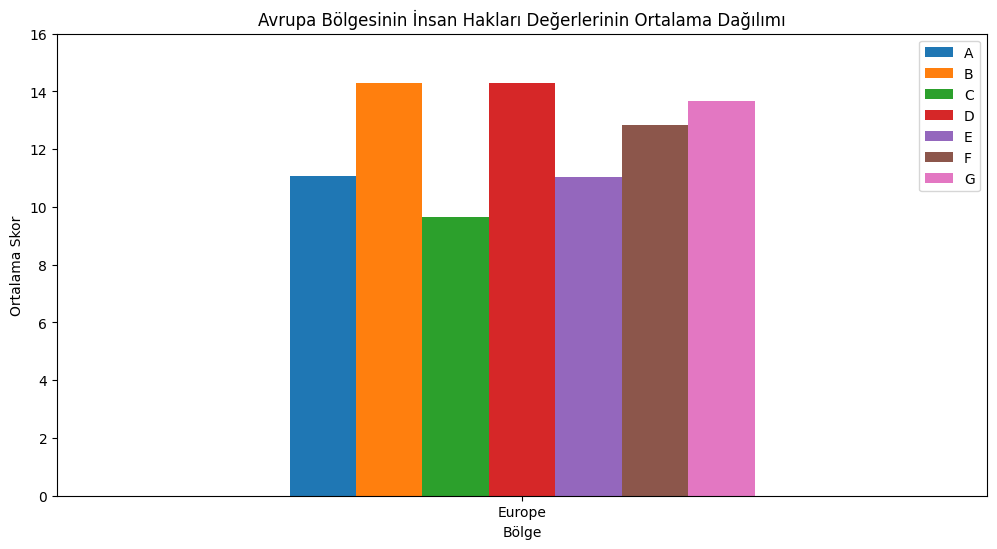

In [ ]:
europe_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Avrupa Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Europe" bölgesinin grafiği oluşturuldu.

In [ ]:
americas_data = df[df["Region"] == "Americas"] # "Americas" bölgesi filtrelendi.

In [ ]:
americas_averages = americas_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Americas" bölgesinin ortalama değerleri gruplandılarak alındı.

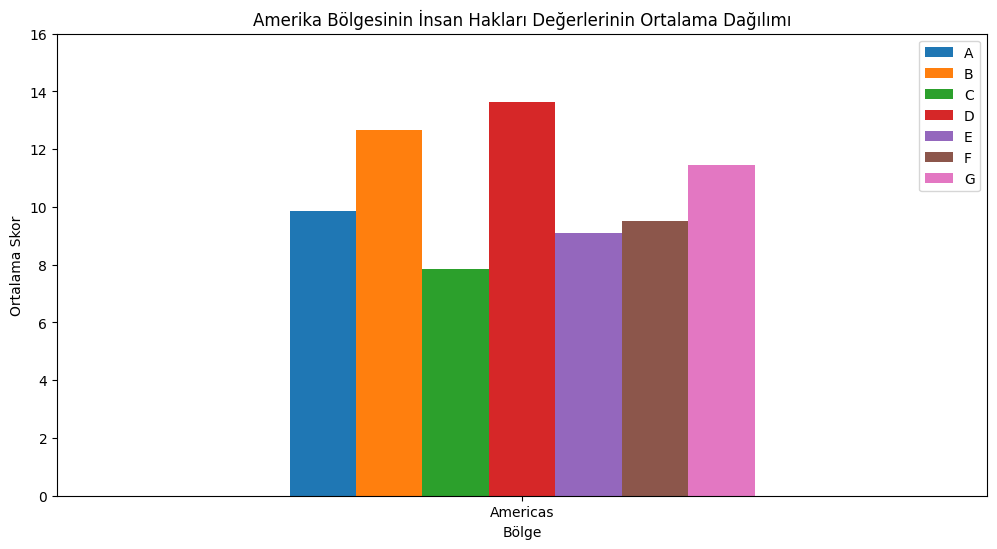

In [ ]:
americas_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Amerika Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Americas" bölgesinin grafiği oluşturuldu.

In [ ]:
middleeast_data = df[df["Region"] == "Middle East"] # "Middle East" bölgesi filtrelendi.

In [ ]:
middleeast_averages = middleeast_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Middle East" bölgesinin ortalama değerleri gruplandılarak alındı.

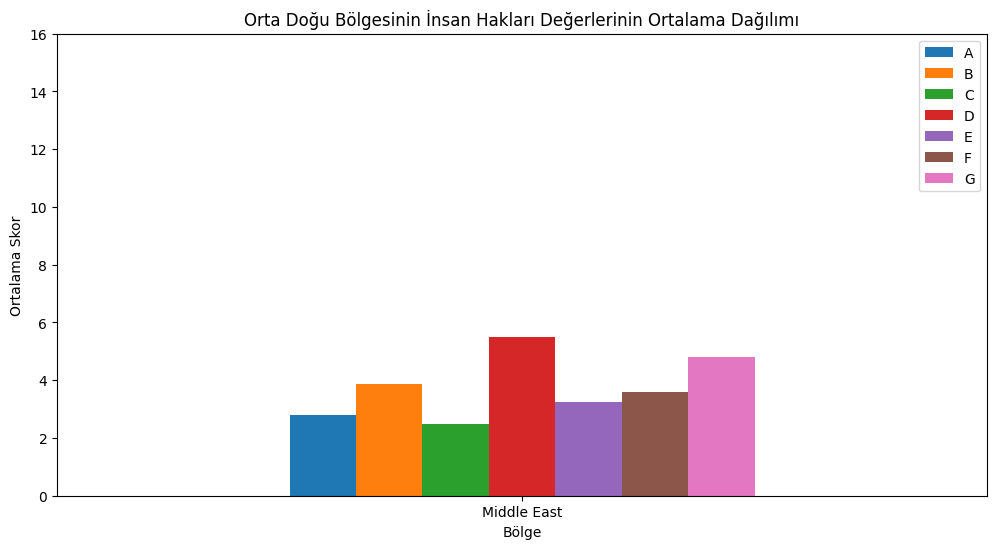

In [ ]:
middleeast_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Orta Doğu Bölgesinin İnsan Hakları Değerlerinin Ortalama Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Middle East" bölgesinin grafiği oluşturuldu.

In [ ]:
!pip install dash
import dash
from dash import dcc, html, Output, Input
import plotly.graph_objects as go #dash kütüphanesi eklendi.

In [ ]:
# Dash uygulamasını başlatıldı.
app = dash.Dash(__name__)

In [ ]:
df_yearly = df[df["Edition"].isin(range(2013, 2023))] # 2013-2022 yılları arasındaki veriler filtrelendi.
df_map = df_yearly[["Country/Territory", "Edition", "Total"]].copy() # Yıl, ülke ve toplam skor seçilip kopyalandı.
df_map.columns = ["Country", "Year", "Freedom Score"] # Sütun isimleri "Country", "Year", "Freedom Score" olarak değiştirildi.

In [ ]:
# Başlangıç yılı
initial_year = 2013
df_initial = df_map[df_map["Year"] == initial_year]


In [ ]:
# Harita için başlangıç figürü
fig_map = go.Figure(go.Choropleth(
    locations=df_initial['Country'],
    z=df_initial['Freedom Score'],
    locationmode='country names',
    colorbar_title="Freedom Score",
    colorscale='Viridis',
    showscale=True,
    hoverinfo='location+z+text',
    text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),
    marker_line_width=0.5,
))

In [ ]:
# Uygulama düzeni
app.layout = html.Div([
    html.H1("Freedom Scores Over Time", style={'text-align': 'center', 'margin-bottom': '20px'}),

    html.Div([  # Renk Paleti Seçimi
        dcc.Dropdown(
            id='colorscale-dropdown',
            options=[
                {'label': 'Viridis', 'value': 'Viridis'},
                {'label': 'Cividis', 'value': 'Cividis'},
                {'label': 'Plasma', 'value': 'Plasma'},
                {'label': 'Inferno', 'value': 'Inferno'},
                {'label': 'Rainbow', 'value': 'Rainbow'},
                {'label': 'Jet', 'value': 'Jet'}
            ],
            value='Viridis',
            style={'width': '45%', 'display': 'inline-block', 'margin': '20px auto'}
        ),
    ], style={'text-align': 'center'}),

    html.Div([  # Ülkeler Arası Karşılaştırma
        dcc.Dropdown(
            id='country1-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='United States',
            style={'width': '45%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='country2-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='India',
            style={'width': '45%', 'display': 'inline-block', 'margin-left': '10px'}
        ),
    ], style={'text-align': 'center', 'margin-top': '30px'}),

    html.Div([  # Harita
        dcc.Graph(id="world-map", figure=fig_map, style={'height': '70vh', 'width': '75%', 'display': 'inline-block'})
    ], style={'margin-bottom': '30px'}),

    html.Div([  # Karşılaştırma grafiği
        dcc.Graph(id="comparison-graph", style={'height': '50vh', 'width': '75%', 'display': 'inline-block'})
    ], style={'margin-top': '30px'}),

], style={'padding': '20px', 'display': 'flex', 'flex-direction': 'column', 'align-items': 'center'})

In [ ]:
@app.callback(
    Output("world-map", "figure"),
    [Input("colorscale-dropdown", "value")]
)
def update_map_colorscale(colorscale):
    # Yeni renk paleti seçildiğinde harita figürünü güncelle
    fig_map = go.Figure(go.Choropleth(
        locations=df_initial['Country'],
        z=df_initial['Freedom Score'],
        locationmode='country names',
        colorbar_title="Freedom Score",
        colorscale=colorscale,
        showscale=True,
        hoverinfo='location+z+text',
        text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),
        marker_line_width=0.5,
    ))
    return fig_map  # Güncellenmiş harita figürünü döndür

In [ ]:
@app.callback(
    Output("comparison-graph", "figure"),
    [Input("country1-dropdown", "value"), Input("country2-dropdown", "value")]
)
def update_comparison_graph(country1, country2):
    # İki ülkenin verilerini alındı.
    country1_data = df_map[df_map['Country'] == country1]
    country2_data = df_map[df_map['Country'] == country2]

    fig_comparison = go.Figure()

    fig_comparison.add_trace(go.Scatter(
        x=country1_data['Year'],
        y=country1_data['Freedom Score'],
        mode='lines+markers',
        name=country1
    ))

    fig_comparison.add_trace(go.Scatter(
        x=country2_data['Year'],
        y=country2_data['Freedom Score'],
        mode='lines+markers',
        name=country2
    ))

    fig_comparison.update_layout(
        title=f"{country1} vs {country2} Freedom Score Comparison",
        xaxis_title="Year",
        yaxis_title="Freedom Score",
        title_x=0.5
    )

    return fig_comparison  # Karşılaştırma grafiği döndürüldü.




In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# Dash uygulamasını başlatıldı.
app = dash.Dash(__name__)


In [ ]:
# Yalnızca 2013-2022 yıllarını içeren veri alındı.
df_yearly = df[df["Edition"].isin(range(2013, 2023))]


In [ ]:
# Temizleme işlemi: Ülke adı ve özgürlük puanlarını içeren veri
df_map = df_yearly[["Country/Territory", "Edition", "Total"]].copy()

In [ ]:
# Kolonları yeniden adlandırıldı.
df_map.columns = ["Country", "Year", "Freedom Score"]

In [ ]:
# Eksik veriler kontrol edildi.
df_map = df_map.dropna(subset=["Country", "Freedom Score"])

In [ ]:
# Ülke isimleri doğru formatta yapıldı. (Örneğin boşluklar ve özel karakterlerden arındırma)
df_map["Country"] = df_map["Country"].str.strip()

In [ ]:
# Başlangıç yılı (2013)
initial_year = 2013
df_initial = df_map[df_map["Year"] == initial_year]


In [ ]:
# Harita için başlangıç figürü
fig_map = go.Figure(go.Choropleth(
    locations=df_initial['Country'],
    z=df_initial['Freedom Score'],
    locationmode='country names',
    colorbar_title="Freedom Score",
    colorscale='Viridis',
    showscale=True,
    hoverinfo='location+z+text',  # Hoverda ülke adı ve özgürlük puanı gösterilecek
    text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),  # Country ismi ve skoru
    marker_line_width=0.5,
))


In [ ]:
# Uygulama düzeni
app.layout = html.Div([
    html.H1("Freedom Scores Over Time", style={'text-align': 'center', 'margin-bottom': '30px', 'font-size': '32px'}),

    # Üstte renk paleti seçimi
    html.Div([
        dcc.Dropdown(
            id='colorscale-dropdown',
            options=[
                {'label': 'Viridis', 'value': 'Viridis'},
                {'label': 'Cividis', 'value': 'Cividis'},
                {'label': 'Plasma', 'value': 'Plasma'},
                {'label': 'Inferno', 'value': 'Inferno'},
                {'label': 'Rainbow', 'value': 'Rainbow'},
                {'label': 'Jet', 'value': 'Jet'}
            ],
            value='Viridis',
            style={'width': '50%', 'margin': '0 auto'}
        ),
    ], style={'margin-bottom': '30px', 'text-align': 'center'}),

    # Ülkeler Arası Karşılaştırma
    html.Div([
        dcc.Dropdown(
            id='country1-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='United States',
            style={'width': '45%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='country2-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='India',
            style={'width': '45%', 'display': 'inline-block', 'margin-left': '10px'}
        ),
    ], style={'text-align': 'center', 'margin-bottom': '40px'}),

    # Harita
    html.Div([
        dcc.Graph(id="world-map", figure=fig_map, style={'height': '75vh', 'width': '100%'})
    ], style={'margin-bottom': '30px'}),

    # Karşılaştırma grafiği
    html.Div([
        dcc.Graph(id="comparison-graph", style={'height': '50vh', 'width': '100%'})
    ], style={'margin-top': '30px'}),

], style={'padding': '20px', 'backgroundColor': '#f4f6f7'})

In [ ]:
# Callback for updating map colorscale
@app.callback(
    Output("world-map", "figure"),
    [Input("colorscale-dropdown", "value")]
)
def update_map_colorscale(colorscale):
    # Yeni renk paleti seçildiğinde harita figürünü güncelle
    fig_map = go.Figure(go.Choropleth(
        locations=df_initial['Country'],
        z=df_initial['Freedom Score'],
        locationmode='country names',
        colorbar_title="Freedom Score",
        colorscale=colorscale,
        showscale=True,
        hoverinfo='location+z+text',  # Hoverda ülke adı ve özgürlük puanı gösterilecek
        text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),  # Country ismi ve skoru
        marker_line_width=0.5,
    ))
    return fig_map  # Güncellenmiş harita figürünü döndür

In [ ]:
# Callback for updating comparison graph
@app.callback(
    Output("comparison-graph", "figure"),
    [Input("country1-dropdown", "value"), Input("country2-dropdown", "value")]
)
def update_comparison_graph(country1, country2):
    # İki ülkenin verileri alındı.
    country1_data = df_map[df_map['Country'] == country1]
    country2_data = df_map[df_map['Country'] == country2]

    fig_comparison = go.Figure()

    fig_comparison.add_trace(go.Scatter(
        x=country1_data['Year'],
        y=country1_data['Freedom Score'],
        mode='lines+markers',
        name=country1
    ))

    fig_comparison.add_trace(go.Scatter(
        x=country2_data['Year'],
        y=country2_data['Freedom Score'],
        mode='lines+markers',
        name=country2
    ))

    fig_comparison.update_layout(
        title=f"{country1} vs {country2} Freedom Score Comparison",
        xaxis_title="Year",
        yaxis_title="Freedom Score",
        title_x=0.5,
        plot_bgcolor="#f4f6f7"  # Grafik arka plan rengini ayarlandı.
    )

    return fig_comparison  # Karşılaştırma grafiğini döndür

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# sütun icin olan kisim
df_map = df_latest[["Country/Territory", "Total"]].copy()
df_map.columns = ["Country", "Freedom Score"]

custom_scale = ["darkred", "red", "orange", "yellow", "lightgreen", "green"]


fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Freedom Score",
    color_continuous_scale=custom_scale,
    title="Global Freedom Index (Total Score) - 2022",
)


fig.write_html("freedom_total_map.html")


fig.show()

In [ ]:
df_latest = df[df["Edition"] == 2022]

# sütun icin olan kisim
df_map = df_latest[["Country/Territory", "Status"]].copy()
df_map.columns = ["Country", "Freedom Score"]

custom_scale = ["darkred", "red", "orange", "yellow", "lightgreen", "green"]


fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Freedom Score",
    color_continuous_scale=custom_scale,
    title="Global Freedom Index (Total Score) - 2022",
)


fig.write_html("freedom_total_map.html")


fig.show()

In [ ]:
# Gelişmekte olan ülkelerin listesi
developing_countries = [
    "China", "India", "Indonesia", "Philippines", "Nigeria",
    "Kenya", "South Africa", "Egypt", "Brazil", "Argentina",
    "Colombia", "Peru", "Turkey", "Saudi Arabia", "Iran"
]

# Gelişmekte olan ülkeleri seçme
df_developing = df[df["Country/Territory"].isin(developing_countries)]

# Grafik oluşturma
fig = px.line(
    df_developing,
    x="Edition",
    y="Total",
    color="Country/Territory",
    title="Gelişmekte Olan Ülkelerin Yıllık Özgürlük Puanı",
    labels={"Edition": "Yıl", "Total": "Özgürlük Puanı"}
)

# Grafiği gösterme
fig.show()

In [ ]:
# Yıllara göre en düşük 20 ülkeyi seçme
df_sorted = df.sort_values(by=["Edition", "Total"]).groupby("Edition").head(20)

# Renk skalasını belirleme (Koyu kırmızıdan açık yeşile)
custom_scale = ["darkred", "red", "orange", "yellow"]

# Animasyonlu çubuk grafik oluşturma
fig = px.bar(
    df_sorted,
    x="Total",
    y="Country/Territory",
    color="Total",
    color_continuous_scale=custom_scale,
    animation_frame="Edition",
    title="Yıllara Göre En Kötü 20 Ülke (Özgürlük Puanına Göre)",
    orientation="h"
)

# Her yıl geçişi arasında 2 saniye bekleme süresi ayarlama
fig.layout.updatemenus[0].buttons[0].args[1]["frame"] = {"duration": 4000, "redraw": True}

# Haritayı HTML olarak kaydetme
fig.write_html("freedom_worst_20_animation.html")

# Haritayı gösterme
fig.show()

In [ ]:
# Türkiye'yi seçme
df_turkey = df[df["Country/Territory"] == "Turkey"]

# Türkiye'nin yıllar içindeki özgürlük puanlarını görselleştirme
fig = px.line(
    df_turkey,
    x="Edition",
    y="Total",
    title="Türkiye'nin Yıllar İçindeki Özgürlük Puanı",
    labels={"Edition": "Yıl", "Total": "Özgürlük Puanı"},
    line_shape="linear"
)

# Grafiği gösterme
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score #K-Means için gerekli kütüphaneler yüklendi.

In [ ]:
columns_to_cluster = ["Total", "PR rating", "CL rating"] # Kümeleme için kullanılacak sütunlar belirlendi.
df_cluster = df[columns_to_cluster].dropna() # Seçilen sütunlardan eksik veriler (varsa) kaldırıldı.

In [ ]:
scaler = StandardScaler() # Verileri standartlaştırmak için StandardScaler nesnesi oluşturuldu.
df_scaled = scaler.fit_transform(df_cluster) # df_cluster verisi standartlaştırıldı.

In [ ]:
# en iyi k değerini bulmak için dirsek methodunu kullandım.
inertia = [] # Inertia değerlerini saklamak için liste oluşturuldu.
k_values = range(1, 11) # Kümeleme için denenecek k değerleri aralığını belirtildi.
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # K-means modelini oluşturuldu.
    kmeans.fit(df_scaled) # Modeli veriye uygulandı.
    inertia.append(kmeans.inertia_) # Inertia değeri listeye eklendi.

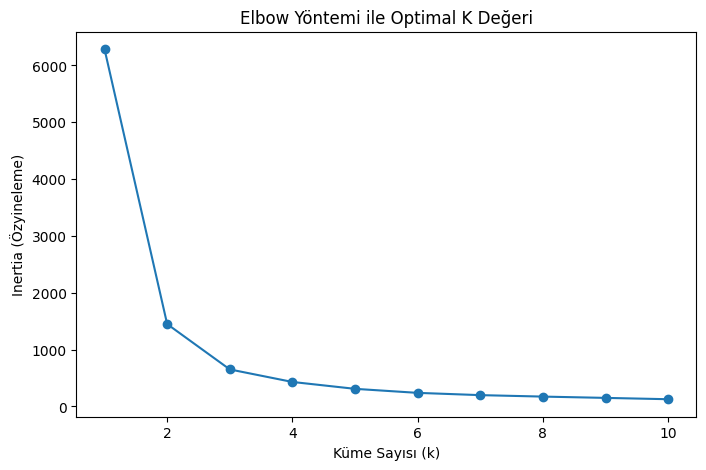

In [ ]:
# dirsek methodunun görseli
plt.figure(figsize=(8, 5)) # Grafik boyutları ayarlandı.
plt.plot(k_values, inertia, marker="o", linestyle="-")  # Inertia değerleri çizgi grafiği ile görselleştirildi.
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Özyineleme)")
plt.title("Elbow Yöntemi ile Optimal K Değeri")
plt.show()

In [ ]:
# Silüet skorları hesaplandı. (en iyi k= 2 çıktı)
silhouette_scores = {} # Silüet skorlarını saklamak için sözlük oluşturuldu.
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # K-means modeli oluşturuldu.
    clusters = kmeans.fit_predict(df_scaled) # Veri kümelendi ve tahmin edilen kümeler alındı.
    silhouette_scores[k] = silhouette_score(df_scaled, clusters) # Silüet skoru hesaplandı ve sözlüğe eklendi.
print("Silhouette Skorları:", silhouette_scores) # Silüet skorları yazdırıldı.

Silhouette Skorları: {2: 0.6426392811966303, 3: 0.6076352421131751, 4: 0.5629752017851273, 5: 0.5516171983553061}


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # K-means modeli 2 küme ile oluşturuldu.
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled) # Kümeleme işlemi yapıldı ve sonuçları "Cluster" sütununa eklendi.


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(
    self=Index(['Country', 'Freedom Score'], dtype='object'),
    key='Year'
)
   3804         try:
-> 3805             return self._engine.get_loc(casted_key)
        self._engine.get_loc = <bound method IndexEngine.get_loc of <pandas._libs.index.ObjectEngine object at 0x7979179ca9e0>>
        casted_key = 'Year'
   3806         except KeyError as err:

index.pyx in pandas._libs.index.IndexEngine.get_loc()

index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Year'

The above exception was the direct cause of the following exception:

KeyError             

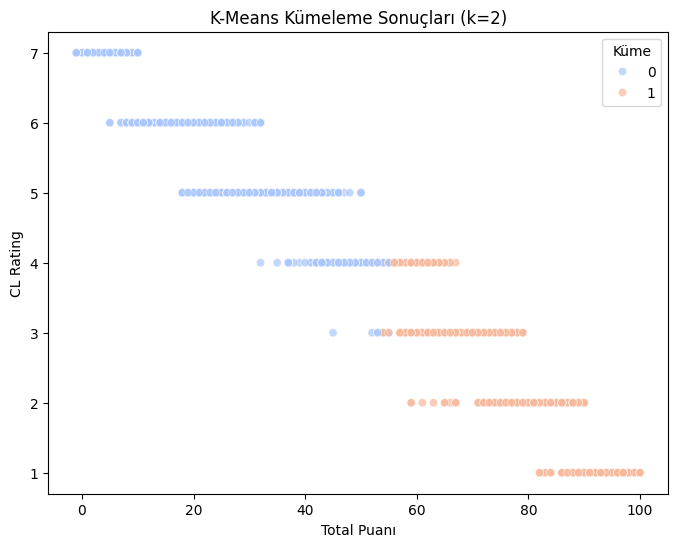

In [ ]:
# Kümeleme sonuçları görselleştirildi.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_cluster["Total"],
    y=df_cluster["CL rating"],
    hue=df_cluster["Cluster"],
    palette="coolwarm",
    alpha=0.7
)
plt.xlabel("Total Puanı")
plt.ylabel("CL Rating")
plt.title("K-Means Kümeleme Sonuçları (k=2)")
plt.legend(title="Küme")
plt.show()

In [ ]:
df["Cluster"] = df_cluster["Cluster"] # Kümeleme sonuçları ana veri setine eklendi.
print(df[["Country/Territory", "Total", "PR rating", "CL rating", "Cluster"]].head(10)) # İlk 10 satır görüntülendi.

     Country/Territory  Total  PR rating  CL rating  Cluster
0             Abkhazia     40          5          5        0
1          Afghanistan     10          7          6        0
2              Albania     67          3          3        1
3              Algeria     32          6          5        0
4              Andorra     93          1          1        1
5               Angola     30          6          5        0
6  Antigua and Barbuda     85          2          2        1
7            Argentina     84          2          2        1
8              Armenia     55          4          4        0
9            Australia     95          1          1        1


In [ ]:
cluster_counts = df["Cluster"].value_counts() # Her bir kümenin kaç ülke içerdiği gösterildi.
cluster_countries = df.groupby("Cluster")["Country/Territory"].apply(list) # Her küme için ülkeler bir liste olarak gruplandı.

cluster_counts, cluster_countries # Küme sayıları ve ülkeler gösterildi.

(Cluster
 1    1183
 0     912
 Name: count, dtype: int64,
 Cluster
 0    [Abkhazia, Afghanistan, Algeria, Angola, Armen...
 1    [Albania, Andorra, Antigua and Barbuda, Argent...
 Name: Country/Territory, dtype: object)

In [ ]:
cluster_means = df.groupby("Cluster")[["Total", "PR rating", "CL rating"]].mean() # Her küme için belirtilen sütunların ortalamaları hesaplandı.
cluster_means # Küme ortalamaları gösterildi.

,Total,PR rating,CL rating
Cluster,,,
0,27.407895,5.813596,5.354167
1,81.226543,1.850380,1.996619


In [ ]:
sample_countries_cluster_0 = df[df["Cluster"] == 0]["Country/Territory"].head(10).tolist() # Küme 0'daki ilk 10 ülke listeye çevirildi.
sample_countries_cluster_1 = df[df["Cluster"] == 1]["Country/Territory"].head(10).tolist() # Küme 1'deki ilk 10 ülke listeye çevirildi.

sample_countries_cluster_0, sample_countries_cluster_1  # Her iki kümenin örnek ülkeleri gösterildi.

(['Abkhazia',
  'Afghanistan',
  'Algeria',
  'Angola',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Belarus',
  'Benin'],
 ['Albania',
  'Andorra',
  'Antigua and Barbuda',
  'Argentina',
  'Australia',
  'Austria',
  'Bahamas',
  'Barbados',
  'Belgium',
  'Belize'])

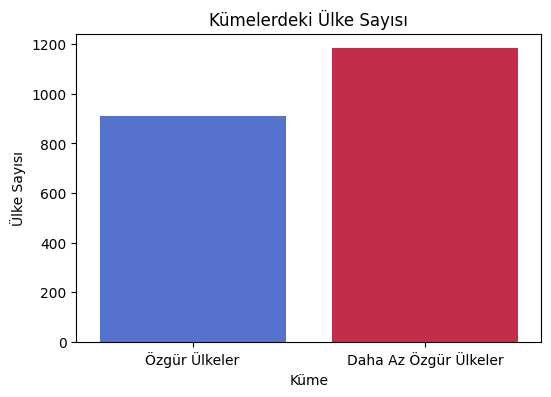

In [ ]:
# Kümelerdeki Ülke Sayısının Barplot ile Gösterimi
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette=["royalblue", "crimson"], legend=False)
plt.xlabel("Küme")
plt.ylabel("Ülke Sayısı")
plt.title("Kümelerdeki Ülke Sayısı")
plt.xticks([0, 1], ["Özgür Ülkeler", "Daha Az Özgür Ülkeler"])
plt.show()  # Grafiği gösterir




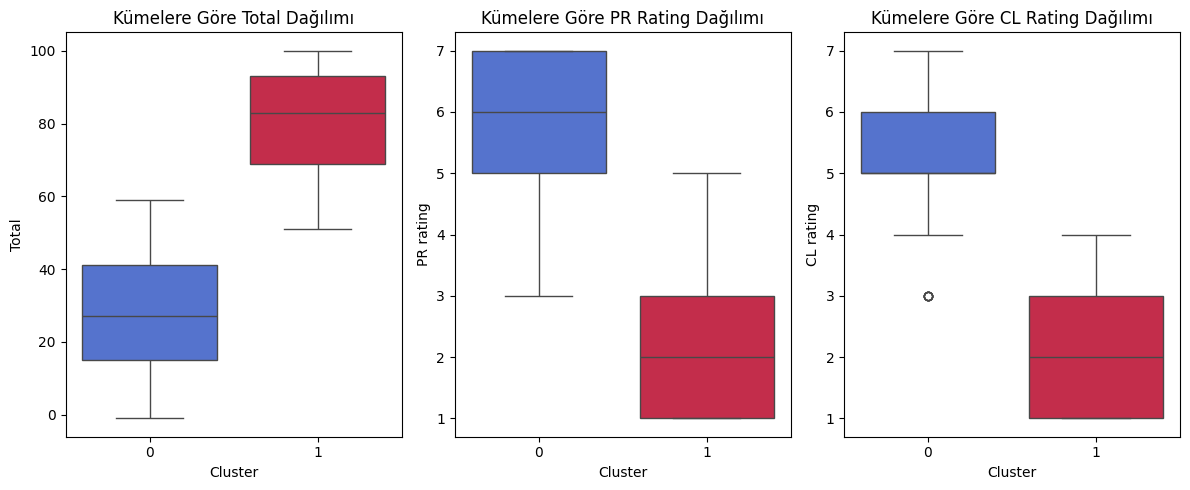

In [ ]:
#Kümelere Göre Total, PR ve CL Rating Dağılımı için boxplot gösterimi
plt.figure(figsize=(12, 5))

# Total dağılımı
plt.subplot(1, 3, 1)
sns.boxplot(x=df["Cluster"], y=df["Total"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("Kümelere Göre Total Dağılımı")

# PR rating dağılımı
plt.subplot(1, 3, 2)
sns.boxplot(x=df["Cluster"], y=df["PR rating"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("Kümelere Göre PR Rating Dağılımı")

# CL rating dağılımı
plt.subplot(1, 3, 3)
sns.boxplot(x=df["Cluster"], y=df["CL rating"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("Kümelere Göre CL Rating Dağılımı")

plt.tight_layout()
plt.show()


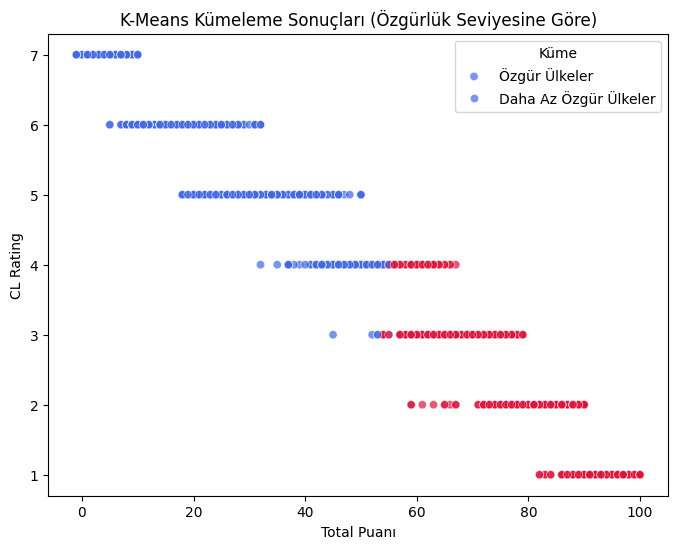

In [ ]:
# Kümelerin Dağılımının Scatterplot ile Gösterimi
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Total"],
    y=df["CL rating"],
    hue=df["Cluster"],
    palette=["royalblue", "crimson"],
    alpha=0.7
)
plt.xlabel("Total Puanı")
plt.ylabel("CL Rating")
plt.title("K-Means Kümeleme Sonuçları (Özgürlük Seviyesine Göre)")
plt.legend(title="Küme", labels=["Özgür Ülkeler", "Daha Az Özgür Ülkeler"])
plt.show()

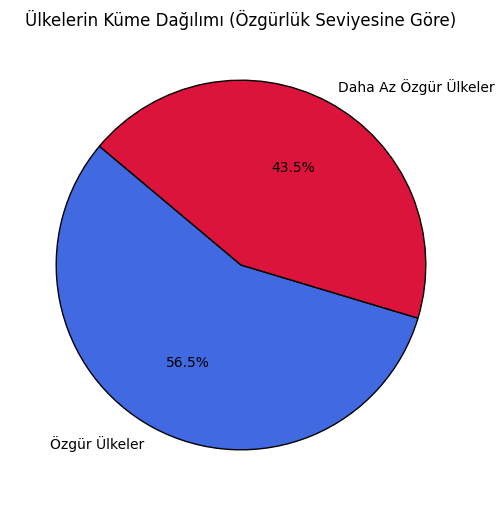

In [ ]:
# Küme Dağılımının Pasta Grafiği ile Gösterimi
plt.figure(figsize=(6, 6))
plt.pie(
    cluster_counts.values,
    labels=["Özgür Ülkeler", "Daha Az Özgür Ülkeler"],
    autopct="%1.1f%%",
    colors=["royalblue", "crimson"],
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Ülkelerin Küme Dağılımı (Özgürlük Seviyesine Göre)")
plt.show()
